In [ ]:
#libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#loading the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
#class name 
class_name = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

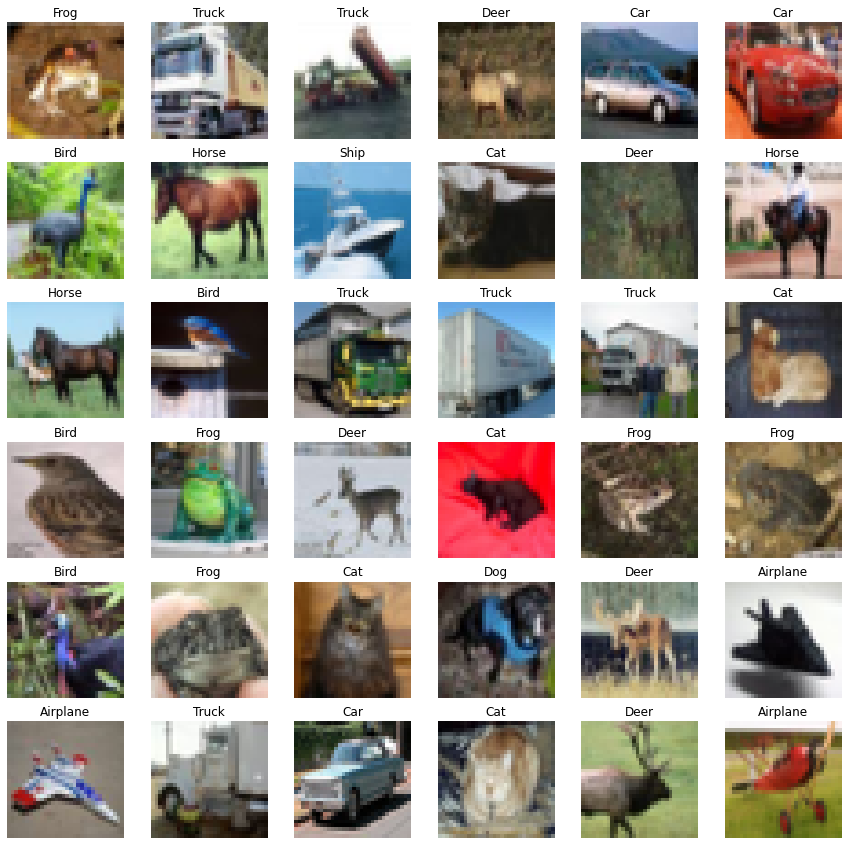

In [ ]:
#visualising the images
plt.figure(figsize=(15, 15))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.axis("off")
    plt.imshow(X_train[i])
    target = y_train[i][0]
    plt.title(class_name[target])
plt.show()

In [ ]:
#normalising the data
X_train = X_train/255.0

X_test = X_test/255.0

In [ ]:
#checking the shape
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
#model Building
model = Sequential()

model.add(Conv2D(input_shape = (32,32,3), filters=64, kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())


model.add(Conv2D(filters=128, kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())



model.add(Flatten())

model.add(Dense(units=512, activation="relu"))

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(units=10, activation="softmax"))


model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])


In [ ]:
#give summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [ ]:
#fitting the model
model.fit(X_train, y_train, validation_split=0.3, epochs= 30, batch_size=32)

Epoch 1/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.4814 - sparse_categorical_accuracy: 0.4598 - val_loss: 1.1525 - val_sparse_categorical_accuracy: 0.5882
Epoch 2/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.0744 - sparse_categorical_accuracy: 0.6221 - val_loss: 1.0686 - val_sparse_categorical_accuracy: 0.6305
Epoch 3/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.8733 - sparse_categorical_accuracy: 0.6965 - val_loss: 0.9797 - val_sparse_categorical_accuracy: 0.6629
Epoch 4/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.7083 - sparse_categorical_accuracy: 0.7505 - val_loss: 0.9304 - val_sparse_categorical_accuracy: 0.6855
Epoch 5/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.5584 - sparse_categorical_accuracy: 0.8069 - val_loss: 1.0110 - val_sparse_categorical_accuracy: 0.6766
Epoch 6/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.4193 - spars

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training-Validation Accuracy')

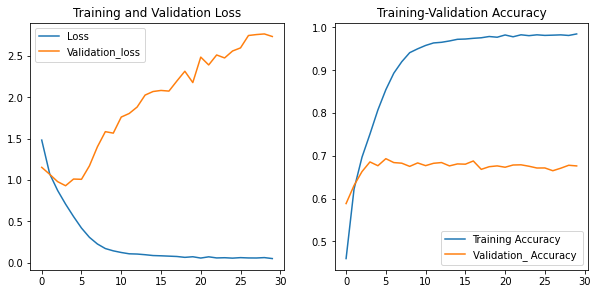

In [ ]:
#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
#building a new model
model = Sequential()

model.add(Conv2D(input_shape = (32,32,3), filters=64, kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())


model.add(Conv2D(filters=128, kernel_size= (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())



model.add(Flatten())

model.add(Dense(units=512, activation="relu"))

model.add(Dense(units=256, activation="relu"))
model.add(Dropout(0.2))


model.add(Dense(units=10, activation="softmax"))


model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["sparse_categorical_accuracy"])

early_stopping = EarlyStopping(monitor="val_loss", mode = "min", verbose=1, patience= 3)

In [ ]:
#ftting the model
model.fit(X_train, y_train, validation_split=0.3, epochs= 30, batch_size=32, callbacks = [early_stopping])

Epoch 1/30
1094/1094 [==============================] - 5s 4ms/step - loss: 1.4607 - sparse_categorical_accuracy: 0.4668 - val_loss: 1.2171 - val_sparse_categorical_accuracy: 0.5665
Epoch 2/30
1094/1094 [==============================] - 4s 4ms/step - loss: 1.0674 - sparse_categorical_accuracy: 0.6212 - val_loss: 0.9960 - val_sparse_categorical_accuracy: 0.6583
Epoch 3/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.8648 - sparse_categorical_accuracy: 0.6978 - val_loss: 0.9467 - val_sparse_categorical_accuracy: 0.6756
Epoch 4/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.6925 - sparse_categorical_accuracy: 0.7556 - val_loss: 0.9189 - val_sparse_categorical_accuracy: 0.6928
Epoch 5/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.5407 - sparse_categorical_accuracy: 0.8093 - val_loss: 1.0077 - val_sparse_categorical_accuracy: 0.6855
Epoch 6/30
1094/1094 [==============================] - 4s 4ms/step - loss: 0.4016 - spars

In [ ]:
#saving the loss
loss = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Training-Validation Accuracy')

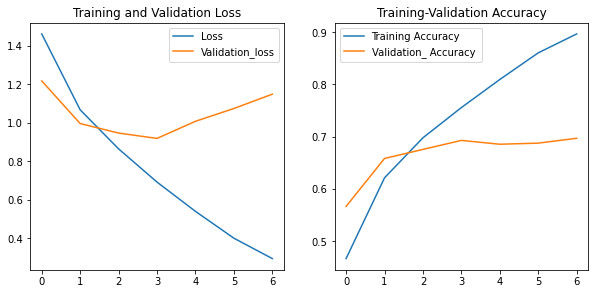

In [ ]:
#plotting loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['sparse_categorical_accuracy'],label = "Training Accuracy")
plt.plot(loss['val_sparse_categorical_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
#saving the preditions
predictions = np.argmax(model.predict(X_test),axis=1)

In [ ]:
#priting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions,target_names=class_name))

              precision    recall  f1-score   support

    Airplane       0.73      0.69      0.71      1000
         Car       0.76      0.85      0.81      1000
        Bird       0.60      0.53      0.56      1000
         Cat       0.49      0.52      0.51      1000
        Deer       0.69      0.58      0.63      1000
         Dog       0.57      0.57      0.57      1000
        Frog       0.78      0.76      0.77      1000
       Horse       0.76      0.76      0.76      1000
        Ship       0.73      0.86      0.79      1000
       Truck       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



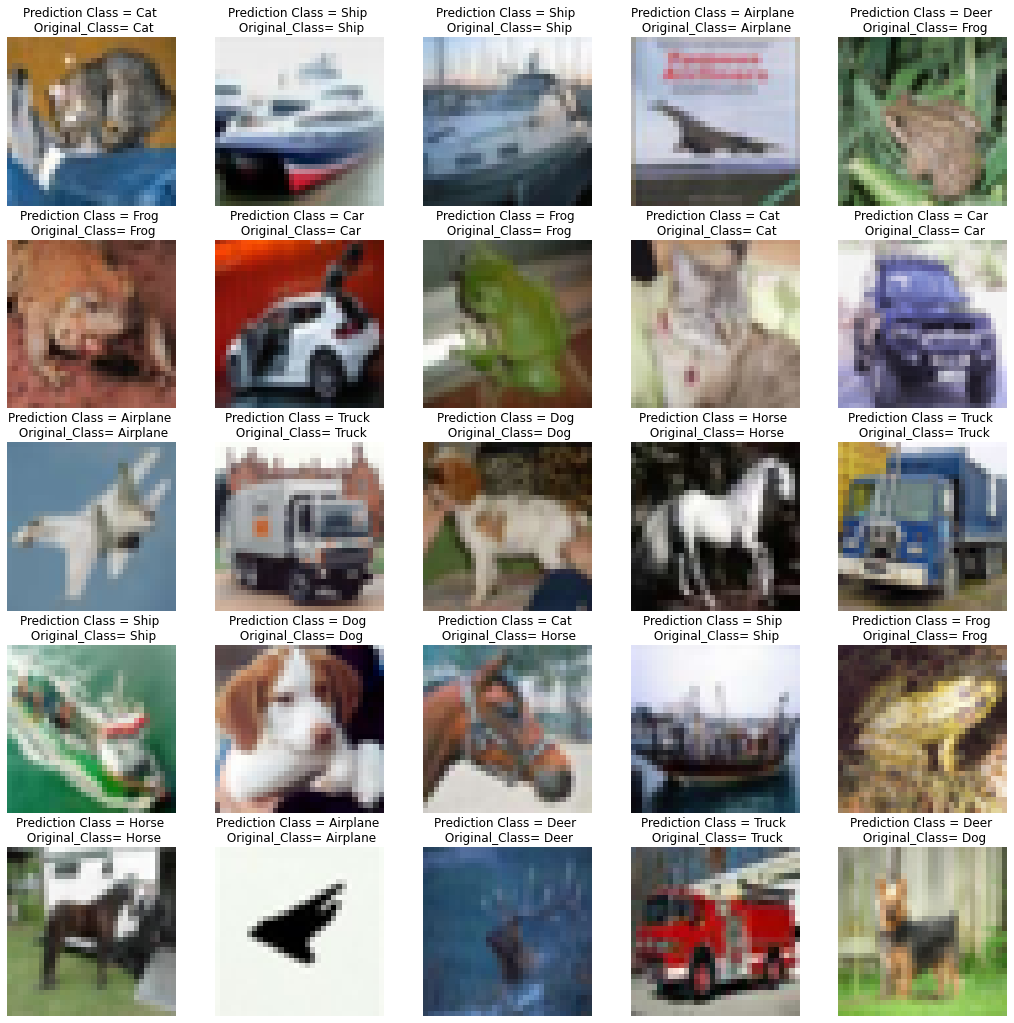

In [ ]:
#visualising the predictions
plt.figure(figsize=(18, 18))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.imshow(X_test[i])
    plt.title(f"Prediction Class = {class_name[predictions[i]]} \n Original_Class= {class_name[y_test[i][0]]}")
plt.show()